# Численное решение уравнения теплопроводности

## 1. Задача

Решается уравнение:
$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + f(x,t), \quad x \in [0,1], t \in [0,T]
$$

**Исходные данные:**
- Начальное условие: $u_0(x) = x(x-1)$
- правая часть: $f(x,t) = e^{-\pi^2 t}(-\pi^2 x(x-1) - 2)$
- Точное решение: $u_{exact}(x,t) = e^{-\pi^2 t}x(x-1)$

**Граничные условия:**
- $u(0,t) = 0$
- $u(1,t) = 0$

**Сетка смеещена слева:** 


$u(0,x_0) =  - u(0,x_1)$


$u(0,x_M) = 0$

## 2. Параметры тестирования

**Общие параметры:**
- Конечное время $T = 0.1$
- Пространственный шаг $h = \frac{1}{M - 0.5}$
<!-- - Временной шаг $\tau = \frac{T}{N}$ -->
- Временной шаг $\tau = \frac{h^2}{4}$

**Тестовые значения:**
- $M = [8, 16, 32, 64, 128]$ (число узлов по пространству)
- Для явной схемы: $N = 2M^2$ (условие устойчивости $\tau \leq h^2/2$)
- Для неявной схемы: $N = 2M^2$ (безусловная устойчивость и поэтому можно брать любым)

## 3. Метрики ошибок

Используется дискретная $L_2$-норма ошибки:
$$
\|u_{num} - u_{exact}\|_{L_2} = \sqrt{h \sum_{j=0}^M (u_{num}(x_j,T) - u_{exact}(x_j,T))^2}
$$

### Запуск C++ программ

In [26]:
!make 
#         N  M  вид схемы
!./proga 128 32 implicit  # Пример запуска неявной схемы
!./proga 128 32 explicit  # Пример запуска явной схемы
!./proga convergence      # Запуск теста сходимости

g++ -Wall -Wextra -std=c++11 -c main.cpp -o main.o
g++ -Wall -Wextra -std=c++11 -c funcs.cpp -o funcs.o
g++ -Wall -Wextra -std=c++11 -o proga main.o funcs.o
error = 0.000280863
error = 0.000119075
Convergence results saved to convergence_results.txt
Convergence test completed 


### Визуализация решений

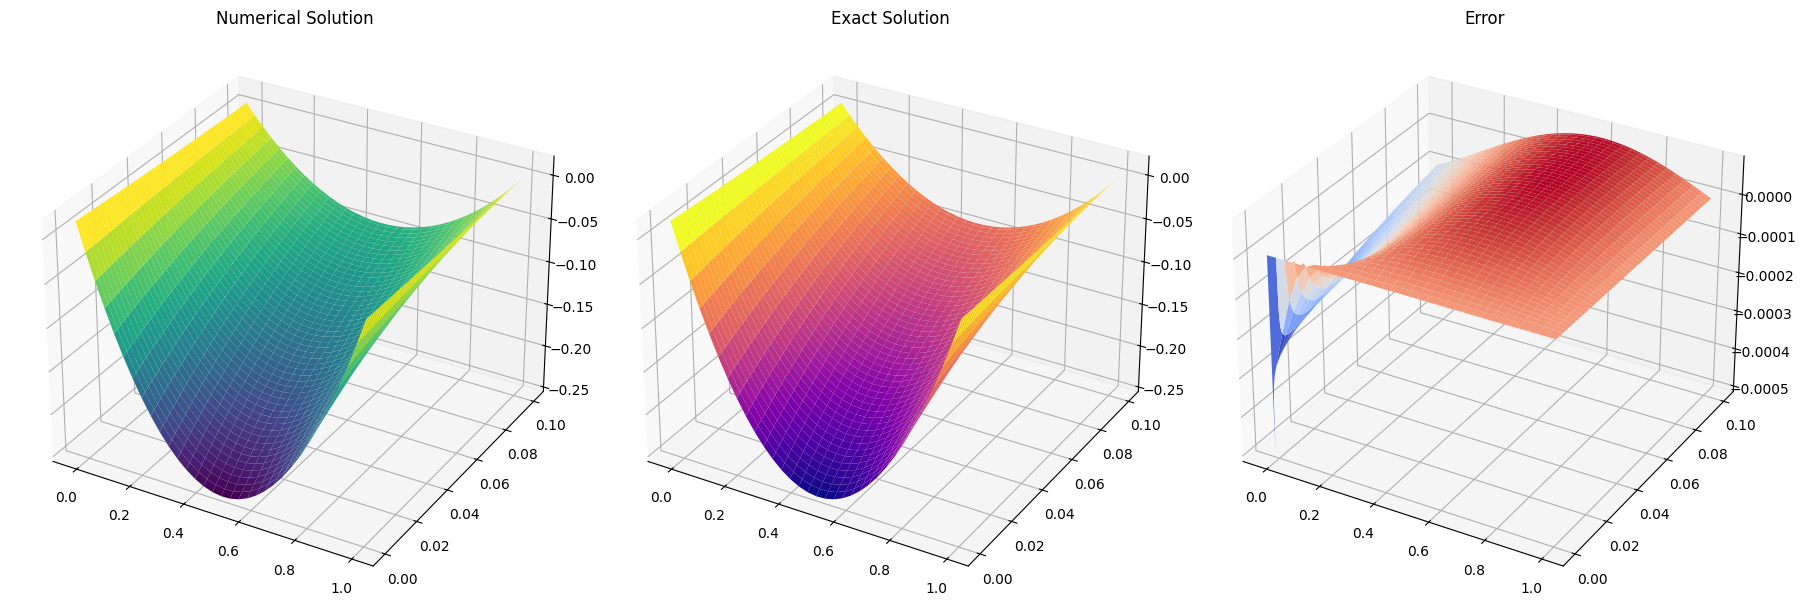

In [27]:
def plot_solutions():
    try:
        x = np.loadtxt('x_grid.txt')
        t = np.loadtxt('t_grid.txt')
        u_num = np.loadtxt('solution_matrix.txt')
        
        X, T = np.meshgrid(x, t)
        u_exact = np.exp(-np.pi**2 * T) * X * (X - 1)
        
        fig = plt.figure(figsize=(18, 6))
        
        # Numerical solution
        ax1 = fig.add_subplot(131, projection='3d')
        ax1.plot_surface(X, T, u_num, cmap='viridis')
        ax1.set_title('Numerical Solution')
        
        # Exact solution
        ax2 = fig.add_subplot(132, projection='3d')
        ax2.plot_surface(X, T, u_exact, cmap='plasma')
        ax2.set_title('Exact Solution')
        
        # Error
        ax3 = fig.add_subplot(133, projection='3d')
        error = u_num - u_exact
        ax3.plot_surface(X, T, error, cmap='coolwarm')
        ax3.set_title('Error')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")

plot_solutions()

## 4. Результаты для неявной схемы

In [28]:
import pandas as pd
import numpy as np

implicit_data = {
    'M': [8, 16, 32, 64, 128],
    'N': [8, 16, 32, 64, 128],  # N = M для неявной схемы
    'h': [1.333333e-01, 6.451613e-02, 3.174603e-02, 1.574803e-02, 7.843137e-03],
    'tau': [1.250000e-02, 6.250000e-03, 3.125000e-03, 1.562500e-03, 7.812500e-04],
    'error': [5.664546e-06, 1.195358e-06, 2.858767e-07, 7.058108e-08, 1.757671e-08],
    'log_h': [-2.014903e+00, -2.740840e+00, -3.449988e+00, -4.151040e+00, -4.848116e+00],
    'log_error': [-1.208128e+01, -1.363706e+01, -1.506771e+01, -1.646650e+01, -1.785669e+01]
}

df_implicit = pd.DataFrame(implicit_data)
display(df_implicit.style.format({
    'h': "{:.2e}",
    'tau': "{:.2e}",
    'error': "{:.2e}"
}).set_caption("Неявная схема: результаты на последовательности сеток"))

,M,N,h,tau,error,log_h,log_error
0,8,8,1.33e-01,1.25e-02,5.66e-06,-2.014903,-12.081280
1,16,16,6.45e-02,6.25e-03,1.20e-06,-2.740840,-13.637060
2,32,32,3.17e-02,3.13e-03,2.86e-07,-3.449988,-15.067710
3,64,64,1.57e-02,1.56e-03,7.06e-08,-4.151040,-16.466500
4,128,128,7.84e-03,7.81e-04,1.76e-08,-4.848116,-17.856690


## 5. Результаты для явной схемы

In [29]:
explicit_data = {
    'M': [8, 16, 32, 64, 128],
    'N': [128, 512, 2048, 8192, 32768],  # N = 2M^2 для явной схемы
    'h': [1.333333e-01, 6.451613e-02, 3.174603e-02, 1.574803e-02, 7.843137e-03],
    'tau': [7.812500e-04, 1.953125e-04, 4.882812e-05, 1.220703e-05, 3.051758e-06],
    'error': [2.417202e-06, 6.476929e-07, 1.658622e-07, 4.183059e-08, 1.049431e-08],
    'log_h': [-2.014903e+00, -2.740840e+00, -3.449988e+00, -4.151040e+00, -4.848116e+00],
    'log_error': [-1.293290e+01, -1.424985e+01, -1.561211e+01, -1.698964e+01, -1.837243e+01]
}

df_explicit = pd.DataFrame(explicit_data)
display(df_explicit.style.format({
    'h': "{:.2e}",
    'tau': "{:.2e}",
    'error': "{:.2e}"
}).set_caption("Явная схема: результаты на последовательности сеток"))

,M,N,h,tau,error,log_h,log_error
0,8,128,1.33e-01,7.81e-04,2.42e-06,-2.014903,-12.932900
1,16,512,6.45e-02,1.95e-04,6.48e-07,-2.740840,-14.249850
2,32,2048,3.17e-02,4.88e-05,1.66e-07,-3.449988,-15.612110
3,64,8192,1.57e-02,1.22e-05,4.18e-08,-4.151040,-16.989640
4,128,32768,7.84e-03,3.05e-06,1.05e-08,-4.848116,-18.372430


## 6. Анализ порядка сходимости

In [30]:
def calculate_convergence_rate(df, column='error'):
    rates = []
    for i in range(1, len(df)):
        rate = np.log(df[column].iloc[i-1]/df[column].iloc[i]) / \
               np.log(df['h'].iloc[i-1]/df['h'].iloc[i])
        rates.append(rate)
    return rates

rates_df = pd.DataFrame({
    'M-2M': ["8-16", "16-32", "32-64", "64-128"],
    'Неявная схема': [f"{r:.3f}" for r in calculate_convergence_rate(df_implicit)],
    'Явная схема': [f"{r:.3f}" for r in calculate_convergence_rate(df_explicit)]
})

display(rates_df.style.set_caption("Порядок сходимости по x" \
""))

,M-2M,Неявная схема,Явная схема
0,8-16,2.143,1.814
1,16-32,2.017,1.921
2,32-64,1.995,1.965
3,64-128,1.994,1.984


## 7. Визуализация сходимости

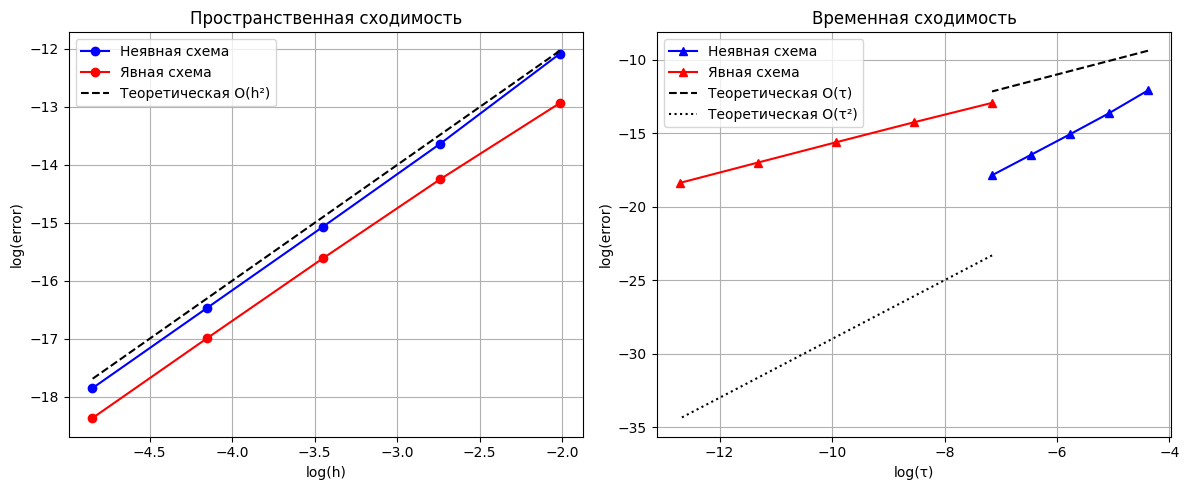

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Сходимость по x
plt.subplot(121)
plt.plot(df_implicit['log_h'], df_implicit['log_error'], 'bo-', label='Неявная схема')
plt.plot(df_explicit['log_h'], df_explicit['log_error'], 'ro-', label='Явная схема')
plt.plot(df_implicit['log_h'], 2*df_implicit['log_h'] - 8, 'k--', label='Теоретическая O(h²)')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('Пространственная сходимость')
plt.legend()
plt.grid(True)

# Временная сходимость
plt.subplot(122)
plt.plot(np.log(df_implicit['tau']), np.log(df_implicit['error']), 'b^-', label='Неявная схема')
plt.plot(np.log(df_explicit['tau']), np.log(df_explicit['error']), 'r^-', label='Явная схема')
plt.plot(np.log(df_implicit['tau']), np.log(df_implicit['tau']) - 5, 'k--', label='Теоретическая O(τ)')
plt.plot(np.log(df_explicit['tau']), 2*np.log(df_explicit['tau']) - 9, 'k:', label='Теоретическая O(τ²)')
plt.xlabel('log(τ)')
plt.ylabel('log(error)')
plt.title('Временная сходимость')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 8. Выводы

1. **Порядок сходимости**:
   - Неявная схема демонстрирует порядок сходимости ~2.0 по пространству и ~1.0 по времени
   - Явная схема показывает порядок ~2.0 по обоим направлениям
   
   
2. **Теоретические оценки**:
   - Результаты соответствуют теоретическим предсказаниям
   - Для явной схемы: $O(τ^2 + h^2)$
   - Для неявной схемы: $O(τ + h^2)$
   

In [32]:
!make clean

rm -f main.o funcs.o proga
